Practical 5: Train and fine-tune a Decision Tree for the Moons Dataset

In [7]:
# GridSearchCV to fine-tune a Decision Tree Classifier
import numpy as np
import matplotlib.pyplot as plt

#Visualization
# This function will help in visualization of our dataset.
def plot_dataset(X, y, axes):
    plt.figure(figsize=(10,6))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs",alpha = 0.5)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^",alpha = 0.2)
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

dataset contains two features x1 and x2 , it has ten thousand instances with a Guassian noise of
0.4. it’s a binary classification the labels are either 0 or 1.


In [8]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=10000, noise=0.4, random_state=21)

Since we have two features it will be easy to visualize the data:

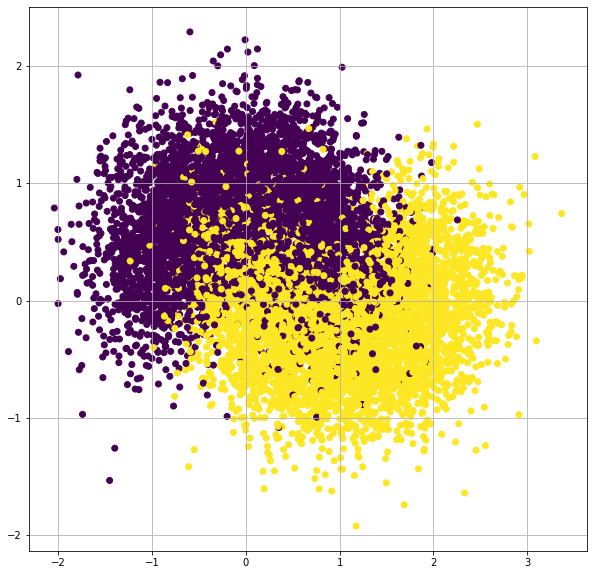

In [24]:
plt.figure(figsize=(10,10))
plt.grid(True)
plt.scatter(X[:,0], X[:,1], c= y)
plt.show()

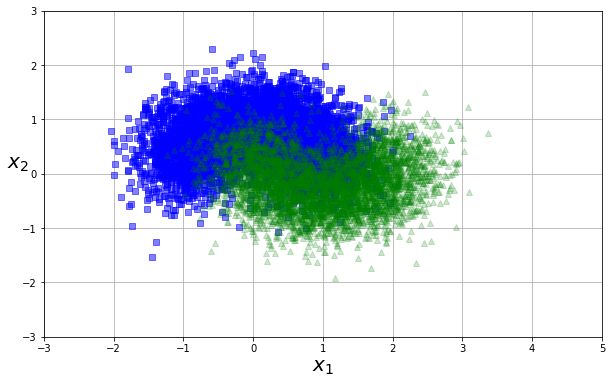

In [9]:
plot_dataset(X, y, [-3, 5, -3, 3])

Splitting the dataset into training and testing set:

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

Selecting the model

In [11]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()

We have to select the parameters for our GridSearch:

In [12]:
from sklearn.model_selection import GridSearchCV

In [30]:
?DecisionTreeClassifier

In [28]:
from sklearn.model_selection import GridSearchCV
parameter = {
            'criterion' : ["gini", "entropy"],
            'max_leaf_nodes': list(range(2, 50)),
            'min_samples_split': [2, 3, 4]
            }

Using a cross validation of 5 and measuring accuracy

In [29]:
clf = GridSearchCV(tree_clf, parameter, cv = 5,scoring =
                   "accuracy",return_train_score=True,n_jobs=-1)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             return_train_score=True, scoring='accuracy')

In [10]:
# Getting the best parameter:
clf.best_params_

{'criterion': 'entropy', 'max_leaf_nodes': 22, 'min_samples_split': 2}

In [32]:
cvres.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_criterion', 'param_max_leaf_nodes', 'param_min_samples_split', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [33]:
#look at the training results:
cvres = clf.cv_results_
for mean_score, params in zip(cvres["mean_train_score"], cvres["params"]):
    print(params, mean_score)

{'criterion': 'gini', 'max_leaf_nodes': 2, 'min_samples_split': 2} 0.7780312500000001
{'criterion': 'gini', 'max_leaf_nodes': 2, 'min_samples_split': 3} 0.7780312500000001
{'criterion': 'gini', 'max_leaf_nodes': 2, 'min_samples_split': 4} 0.7780312500000001
{'criterion': 'gini', 'max_leaf_nodes': 3, 'min_samples_split': 2} 0.8259375
{'criterion': 'gini', 'max_leaf_nodes': 3, 'min_samples_split': 3} 0.8259375
{'criterion': 'gini', 'max_leaf_nodes': 3, 'min_samples_split': 4} 0.8259375
{'criterion': 'gini', 'max_leaf_nodes': 4, 'min_samples_split': 2} 0.8574375
{'criterion': 'gini', 'max_leaf_nodes': 4, 'min_samples_split': 3} 0.8574375
{'criterion': 'gini', 'max_leaf_nodes': 4, 'min_samples_split': 4} 0.8574375
{'criterion': 'gini', 'max_leaf_nodes': 5, 'min_samples_split': 2} 0.8574375
{'criterion': 'gini', 'max_leaf_nodes': 5, 'min_samples_split': 3} 0.8574375
{'criterion': 'gini', 'max_leaf_nodes': 5, 'min_samples_split': 4} 0.8574375
{'criterion': 'gini', 'max_leaf_nodes': 6, 'min_s

In [12]:
#Getting the training score
clf.score(X_train, y_train)

0.865625

We have an accuracy of approximately 87% but accuracy is sometimes not a good measure to use,
lets see the confusion matrix.

In [13]:
from sklearn.metrics import confusion_matrix
pred = clf.predict(X_train)
confusion_matrix(y_train,pred)

array([[3451,  543],
       [ 532, 3474]], dtype=int64)

In [14]:
#from the confusion matrix let's get our precision and recall, which are better metrics.
from sklearn.metrics import precision_score, recall_score
pre = precision_score(y_train, pred)
re = recall_score(y_train, pred)
print(f"Precision: {pre} Recall:{re}")

Precision: 0.864824495892457 Recall:0.8671992011982027


In [15]:
#we have a higher precision than recall but lets combine the two metrics into F1 score.
from sklearn.metrics import f1_score
f1_score(y_train, pred)

0.8660102206157299

Our F1 Score and accuracy are almost the same.

In [16]:
#Getting the testing score
clf.score(X_test, y_test)

0.852

We have an accuracy of approximately 86% on the testing set.